In [1]:
!wget https://datasets-humai.s3.amazonaws.com/datasets/sentiment.csv

--2020-11-09 19:59:41--  https://datasets-humai.s3.amazonaws.com/datasets/sentiment.csv
Resolving datasets-humai.s3.amazonaws.com (datasets-humai.s3.amazonaws.com)... 52.217.8.228
Connecting to datasets-humai.s3.amazonaws.com (datasets-humai.s3.amazonaws.com)|52.217.8.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125932 (123K) [text/csv]
Saving to: ‘sentiment.csv’

sentiment.csv       100%[===================>] 122.98K  --.-KB/s    in 0.002s  

2020-11-09 19:59:41 (50.0 MB/s) - ‘sentiment.csv’ saved [125932/125932]



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sentiment.csv')

In [4]:
df.head()

,Sentiment,Phrase
0,NEGATIVE,Muy aburrida la clase siempre con presentacion...
1,NEGATIVE,La clase es tediosa y el profesor no sabe como...
2,NEGATIVE,Las clases son muy tediosas ya que solo usa di...
3,NEGATIVE,El profesor es decepcionante y forma de evalua...
4,POSITIVE,Es una buena persona y su desempeño en clase e...


In [5]:
df['Sentiment'].value_counts()

POSITIVE    941
NEGATIVE    743
Name: Sentiment, dtype: int64

In [6]:
train,test = train_test_split(df,test_size=0.33)

In [7]:
# labels are in the first column
train_y = train.iloc[:,0]
train_X = train.iloc[:,1]

In [8]:
# Now use scikit-learn's text classifier to train the model.
vec = TfidfVectorizer(min_df=3)
model = MultinomialNB()
clf = make_pipeline(vec,model)
clf = clf.fit(train_X, train_y)

In [9]:
# labels are in the first column
test_y = test.iloc[:,0]
test_X = test.iloc[:,1]

In [10]:
test_X

380     Me gusta como me desenvuelvo, el maestro nos e...
426                       Me agrada su sistema de trabajo
1661     Controlar su temperamento tiene un caracter feo 
1477           Su forma de calificar afecta a los alumnos
559     Debería hablar mas alto y no escribir en cursi...
                              ...                        
214            nos fomenta el interés por opinar en clase
156       Tiene buena disposicion para las explicaciones.
81      Muy buena maestra ya que es de los pocos que d...
1357    Creo que el maestro es fanático de las matemát...
950     Los horarios que maneja son puntuales y nunca ...
Name: Phrase, Length: 556, dtype: object

In [11]:
predictions = clf.predict(test_X)

In [12]:
accuracy_score(test_y,predictions)

0.8615107913669064

In [13]:
df_cm = confusion_matrix(test_y,predictions,labels=test_y.unique())

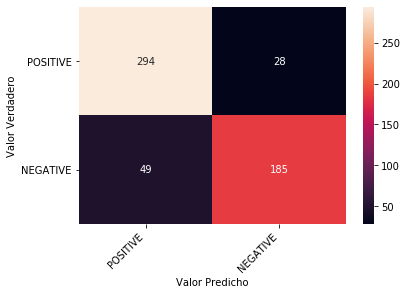

In [14]:
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(test_y.unique(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(test_y.unique(), rotation=45, ha='right')
plt.ylabel('Valor Verdadero')
plt.xlabel('Valor Predicho');
